<a href="https://colab.research.google.com/github/1exip/Learning-PyTorch/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://i.imgur.com/6Ujttb4.png)

In [0]:
#yield_apple = w11 * temp + w12 * rainfall + w13 * humidity
#yield_orange = w21 * temp + w22 * rainfall + w13 * humidity

In [0]:
import numpy as np
import torch

In [0]:
inputs = np.array([[73,67,43],
                   [91,88,64],
                   [87,88,64],
                   [102,43,37],
                   [69,96,70]],dtype='float32')

In [0]:
targets = np.array([[56,70],
                    [81,101],
                    [119,133],
                    [22,37],
                    [103,119]],dtype='float32')

In [0]:
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)
print(w)
print(b)

tensor([[0.7076, 1.5338, 0.2720],
        [0.9974, 0.6944, 1.0063]], requires_grad=True)
tensor([-0.8115, -0.8795], requires_grad=True)


In [0]:
def model(x):
  return x @ w.t() + b

In [0]:
preds = model(inputs)
print(preds)
print(targets)

tensor([[165.3068, 161.7258],
        [215.9668, 215.3933],
        [213.1365, 211.4038],
        [147.3822, 167.9456],
        [214.3031, 205.0441]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [0]:
def mse(predicted,targets):
  diff = targets - predicted
  return torch.sum((diff * diff) / diff.numel())

In [0]:
loss = mse(preds, targets)
print(loss)

tensor(11933.1689, grad_fn=<SumBackward0>)


In [0]:
loss.backward()

In [0]:
print(w)
print(w.grad)

tensor([[0.7076, 1.5338, 0.2720],
        [0.9974, 0.6944, 1.0063]], requires_grad=True)
tensor([[9784.0273, 8712.2334, 6358.6309],
        [8644.0811, 7400.5352, 5430.2607]])


In [0]:
lr = 0.0001

In [0]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(11933.1689, grad_fn=<SumBackward0>)


In [0]:
for epoch in range(100):
  preds = model(inputs)
  loss = mse(preds,targets)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * lr
    b -= b.grad * lr
    w.grad.zero_()
    b.grad.zero_()

In [0]:
print(loss)

tensor(169.9715, grad_fn=<SumBackward0>)


In [0]:
import matplotlib.pyplot as plt

In [0]:
x = inputs
X = np.array(x[:,0])
Y = x @ w.t() + b
Y = Y.detach().numpy()
x = np.array(inputs)

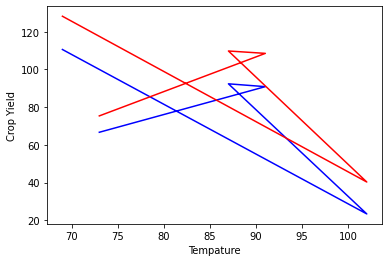

In [0]:
plt.plot(X,Y[:,0],'b')
plt.plot(X,Y[:,1],'r')
plt.xlabel('Tempature')
plt.ylabel('Crop Yield')
plt.show()

In [0]:
print(X,'\n',Y[:,0])


[ 73.  91.  87. 102.  69.] 
 [ 66.650635  90.84476   92.34325   23.339954 110.54874 ]


In [0]:
def linearregression(x,y,lr,epochs,wdim,bdim):
  dim1,dim2 = wdim
  w = torch.randn(dim1,dim2, requires_grad=True)
  b = torch.randn(bdim, requires_grad=True)
  pred = x @ w.t() + b
  loss = mse(pred,y)
  loss.backward()
  print(loss)
  for i in range(epochs):
    pred = x @ w.t() + b
    loss = mse(pred,y)
    loss.backward()
    with torch.no_grad():
      w -= w.grad*lr
      b -= b.grad*lr
      w.grad.zero_()
      b.grad.zero_()
    if i%10==0:
      print("Epoch:",i,"Loss:",loss)


In [0]:
linearregression(inputs,targets,0.0001,70,(2,3),2)

tensor(20960.7305, grad_fn=<SumBackward0>)
Epoch: 0 Loss: tensor(20960.7305, grad_fn=<SumBackward0>)
Epoch: 10 Loss: tensor(1419.4956, grad_fn=<SumBackward0>)
Epoch: 20 Loss: tensor(650.2444, grad_fn=<SumBackward0>)
Epoch: 30 Loss: tensor(360.5061, grad_fn=<SumBackward0>)
Epoch: 40 Loss: tensor(248.4492, grad_fn=<SumBackward0>)
Epoch: 50 Loss: tensor(205.0495, grad_fn=<SumBackward0>)
Epoch: 60 Loss: tensor(188.1800, grad_fn=<SumBackward0>)


In [0]:
import torch.nn as nn

In [0]:
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')

In [0]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [0]:
from torch.utils.data import TensorDataset

In [0]:
train = TensorDataset(inputs,targets)

In [0]:
from torch.utils.data import DataLoader

In [0]:
train_dl = DataLoader(train, batch_size=5, shuffle=True)

In [0]:
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.3579, -0.3641,  0.0802],
        [-0.5444, -0.4676,  0.3221]], requires_grad=True)
Parameter containing:
tensor([ 0.0165, -0.3010], requires_grad=True)


In [0]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.3579, -0.3641,  0.0802],
         [-0.5444, -0.4676,  0.3221]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0165, -0.3010], requires_grad=True)]

In [0]:
preds = model(inputs)
preds

tensor([[-47.0532, -57.5199],
        [-59.4560, -70.3746],
        [-75.2534, -91.6386],
        [-49.1758, -64.0169],
        [-54.0134, -60.2068],
        [-47.0532, -57.5199],
        [-59.4560, -70.3746],
        [-75.2534, -91.6386],
        [-49.1758, -64.0169],
        [-54.0134, -60.2068],
        [-47.0532, -57.5199],
        [-59.4560, -70.3746],
        [-75.2534, -91.6386],
        [-49.1758, -64.0169],
        [-54.0134, -60.2068]], grad_fn=<AddmmBackward>)

In [0]:
import torch.nn.functional as F

In [0]:
loss_fn = F.mse_loss

In [0]:
loss = loss_fn(preds,targets)
print(loss)

tensor(23621.4004, grad_fn=<MseLossBackward>)


In [0]:
opt = torch.optim.SGD(model.parameters(),lr=0.00001)

In [0]:
def fit(epochs,model,loss_fn,opt,train_dl):
  for epoch in range(epochs):
    for xb,yb in train_dl:
      pred = model(xb)
      loss = loss_fn(pred,yb)
      loss.backward()
      opt.step()
      opt.zero_grad()
    if epoch%10==0:
      print('Epoch:',epoch,'Loss:',loss)     

In [0]:
fit(100,model,loss_fn,opt,train_dl)

Epoch: 0 Loss: tensor(8821.0332, grad_fn=<MseLossBackward>)
Epoch: 10 Loss: tensor(135.4454, grad_fn=<MseLossBackward>)
Epoch: 20 Loss: tensor(180.2317, grad_fn=<MseLossBackward>)
Epoch: 30 Loss: tensor(52.2210, grad_fn=<MseLossBackward>)
Epoch: 40 Loss: tensor(49.6877, grad_fn=<MseLossBackward>)
Epoch: 50 Loss: tensor(15.2969, grad_fn=<MseLossBackward>)
Epoch: 60 Loss: tensor(63.4778, grad_fn=<MseLossBackward>)
Epoch: 70 Loss: tensor(27.1521, grad_fn=<MseLossBackward>)
Epoch: 80 Loss: tensor(30.7454, grad_fn=<MseLossBackward>)
Epoch: 90 Loss: tensor(19.8424, grad_fn=<MseLossBackward>)


In [0]:
pip install jovian --upgrade 

     |████████████████████████████████| 92kB 6.4MB/s 
  Created wheel for uuid: filename=uuid-1.30-cp36-none-any.whl size=6502 sha256=22d1c0634de82ecaef21f5be1d5cc55f1e182f223f22044899ba8b3e9fabf687
  Stored in directory: /root/.cache/pip/wheels/2a/80/9b/015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
Successfully built uuid


In [0]:
import jovian
jovian.commit()

[jovian] Error: Failed to detect Jupyter notebook or Python script. Skipping..
